# 주제 :
# 목적 :
# 제출처 :



# 펭귄품종분류기

- 몸길이 무게 이용하여 펭귄의 품종을 출력하여라 

In [1]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.display import Image

from IPython.core.display import display, HTML
display(HTML("<style>.container { font-weight: bold !important; }</style>"))
display(HTML("<style>.container { width: 98% !important; }</style>"))


In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.size'] = 12.0
plt.rcParams['font.family'] = 'Malgun Gothic'

# 머신러닝 과정 

- 모듈 임포트 
- 데이타 수집 (학습데이타)
- 데이타 전처리 
- 데이터 학습 (모델화)
- 데이터 예측 (테스트데이타)
- 데이터 테스트 (정답률)

In [4]:
# 학습기 모듈 
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [5]:
# 학습데이터와 데스트 전용 데이터로 분할하는 메서드 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 데이타 수집 

- penguins.csv

In [35]:

pg = pd.read_csv('penguins.csv')
pg.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [37]:

pg['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [38]:
pg.shape

(344, 7)

In [118]:
pg.dropna(inplace=True)

In [119]:
x = pg[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]

In [120]:
x = x.astype(np.float)
x =round(x,4)


In [114]:
x.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [122]:
x.shape, y.shape

((333, 4), (333,))

In [97]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 4 columns):
bill_length_mm       342 non-null float64
bill_depth_mm        342 non-null float64
flipper_length_mm    342 non-null float64
body_mass_g          342 non-null float64
dtypes: float64(4)
memory usage: 10.8 KB


# 데이타 전처리 

In [41]:
x = pg[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]

In [121]:
y = pg["species"]

In [53]:
x.columns


Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')

In [54]:
y.index

RangeIndex(start=0, stop=344, step=1)

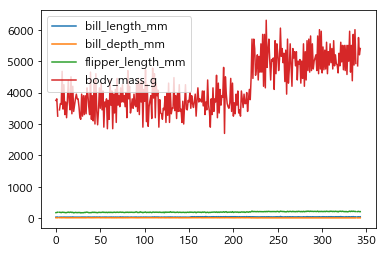

In [46]:
pg.plot()

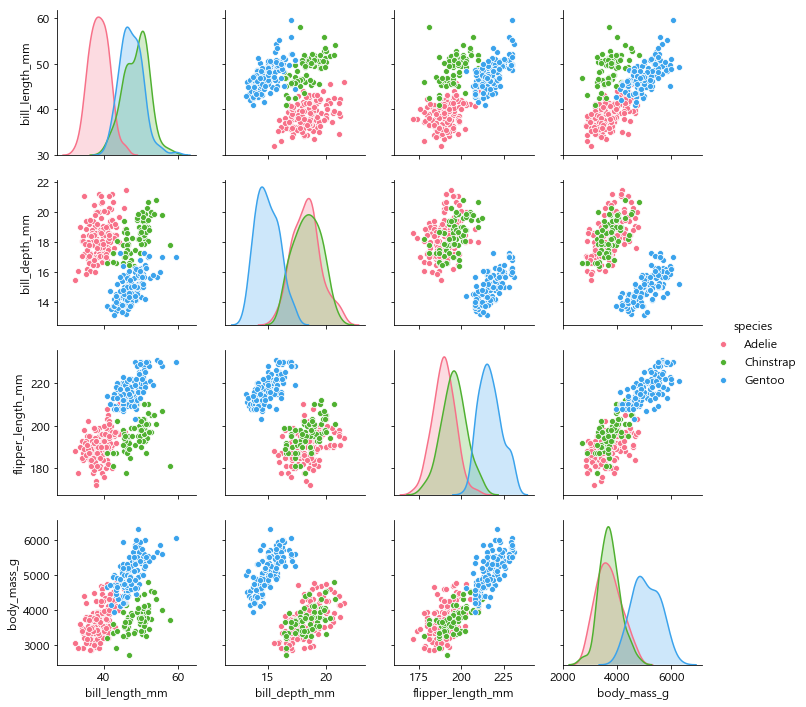

In [48]:
sns.pairplot(pg, hue="species", palette="husl")

In [63]:
pg.dropna(inplace=True) #null인 데이터는 안쓴다는 것

### 학습 전용과 테스트 전용 분리하기 

- 학습데이터와 데스트 전용 데이터로 분할하는 메서드 
- 임포트 
    - from sklearn.model_selection import train_test_split

```
    train_test_split( data, label, 
                       test_size=float, train_size=float, 
                        shuffle=True/False)
```                    

In [98]:
pg.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [115]:
from sklearn.model_selection import train_test_split

In [123]:
x_train, x_test, y_train, y_test \
    = train_test_split( x, y, test_size = 0.25, 
                         train_size = 0.75, 
                         shuffle = True)

In [124]:
x_train.shape, x_test.shape,

((249, 4), (84, 4))

In [125]:
y_train.shape, y_test.shape

((249,), (84,))

In [102]:
x_train.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
151,41.500000,18.500000,201.0,4000.0
154,51.299999,19.200001,193.0,3650.0
116,38.599998,17.000000,188.0,2900.0
171,49.200001,18.200001,195.0,4400.0
130,38.500000,17.900000,190.0,3325.0


In [103]:
x_test.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
249,50.000000,15.300000,220.0,5550.0
227,46.700001,15.300000,219.0,5200.0
66,35.500000,16.200001,195.0,3350.0
10,37.799999,17.100000,186.0,3300.0
278,43.200001,14.500000,208.0,4450.0


### 데이타 학습  : 모델링

In [126]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [127]:
model = SVC()
model.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [128]:
model.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [130]:
y_pred = model.predict(x_test)
y_pred

array(['Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie'],
      dtype=object)

In [131]:
pg.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


In [136]:
pg[pg['species']=='Chinstrap'].head()
pg.

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,MALE
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,MALE


### 데이터 예측 

In [133]:
model.predict([[46.5, 18.7, 188.0, 3725.0]])

array(['Adelie'], dtype=object)

In [134]:
from sklearn.metrics import mean_squared_error, accuracy_score

In [135]:
print("정답률 = " , accuracy_score(y_test, y_pred))

정답률 =  0.6071428571428571


### 결과 확인 

metrics.accuracy_score(label, clf.predict(data))